# Section05 “输出”模块：智能化输出自己的工作成果

## 1 怎么用数据透视表更直观地展示汇报成果？

### 1.1 利用数据透视表进行灵活的数据分析

- 使用工具：Excel中的插件“Power Pivot”
- 实现步骤：
    1. 数据预处理
    2. 生成透视表
    3. 调整透视表结果

### 1.2 数据预处理

使用“Power Query”对表格进行调整，也可以使用`Python`对`Excel`的数据内容进行调整。

### 1.3 生成透视表

- 打开数据透视表菜单：在新的工作表中插入数据透视表了。插入数据透视表的命令在“插入”菜单栏的“表格”命令组，找到“数据透视表”按钮，点击后打开创建数据透视表的菜单
- “选择要分析的数据”选项：Excel会自动选择当前表中的所有数据，可以根据需要选取数据明细表中的具体数据范围
- 请选择放置数据透视表的位置”选项：把透视表放在“新工作表”中

### 1.4 调整透视表结果

创建好默认的数据透视表之后，把“报表的字段”拖动到透视表区域。

### 1.5 使用Power Pivot插件扩展数据透视表，实现多表统计

- 主要用途：扩展了数据透视表在处理数据的维度、数据的容量限制和自定义汇总的公式这三方面的功能

- 特性：
    1. 在维度上，它在单张数据表的维度上增加了数据表维度，即：能支持多张表格进行数据透视
    2. 容量上，从默认的 100 万行数据透视表的默认大小，扩展到能够支持上亿行的数据

- 操作步骤：
  1. 打开Power Pivot插件：可以在菜单栏找到Power Pivot插件的选项卡
  2. 加载多张表：使用“添加到数据模型”按钮。点击按钮后会弹出“创建表”窗口。这个窗口可以选择两张表中的其中一张，先作为数据模型，再逐步加入其他工作表
  3. 生成由Power Pivot制作的数据透视表：在Power Pivot窗口的任意一张表点击“数据透视表”按钮之后，创建新的数据透视表

## 2 条形、饼状、柱状图最适合用在什么场景下？

### 2.1 用 seaborn 生成图表的基本流程

1. 导入`seaborn`库
2. 设置图表样式
3. 绘制图形

### 2.2 设置图表样式

- 图表样式的组成：由背景风格和图表类型两部分组成
- 背景风格样式的设置：`seaborn.set()`

| 风格名 | 配置 |
| :-: | :-: |
| 暗黑网格 | darkgrid |
| 白色网格 | whitegrid |
| 暗黑无网格 | dark |
| 白色无网格 | white |
| 空白背景 | ticks |

- 图表类型的设置：以展示鸢尾花的花瓣和花萼的长短分布情况为例，通过`seaborn.pairplot()`绘制散点图

### 2.3 代码示例（绘制鸢尾花的花瓣和花萼的长短分布情况）

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

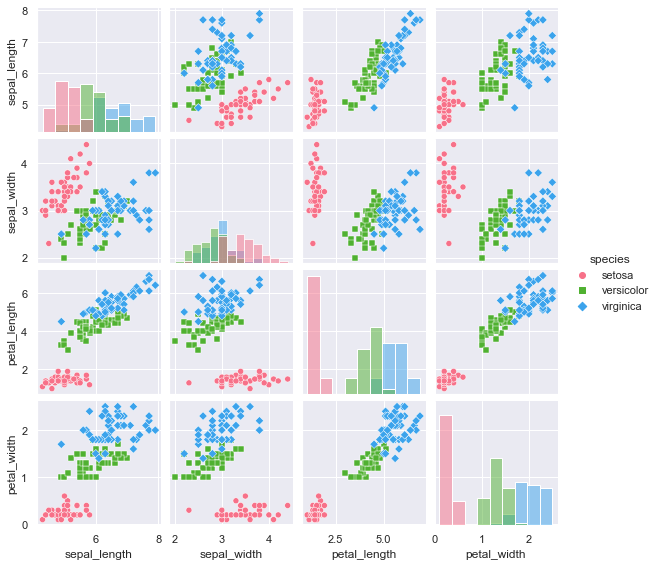

In [10]:
# 设置背景
sns.set(style="darkgrid", color_codes=True)

# 使用示例数据
iris = sns.load_dataset('iris',data_home='data/ch24/seaborn-data', cache=True)

# 加载数据，使用散点图，设置点的颜色和样式
sns.pairplot(iris,
    kind = 'scatter', #散点图
    diag_kind = 'hist', #直方图
    hue = 'species', #按照某一字段进行分类
    palette = 'husl', #设置调色板
    markers = ['o', 's', 'D'], #设置不同系列的点样式
    height = 2 #图标大小
)

### 2.4 为不同的应用场景选择合适的图表

1. 关系类，用于展示数据集中多个变量之间的关系，`relplot()`、`scatterplot()`、`lineplot()`都属于关系类
2. 分布类，用于展示数据集中多个变量的分布情况，`displot()`、`kdeplot()`是这一类经常使用的图表类型
3. 线性关系类，是把多个变量联系起来，观察每个采样的线性变化趋势。`regplot()`和` lmplot()`经常用于表示线性关系
4. 结构化多图，用于把多种方式的分析数据放在一起进行展示。例如我们分析鸢尾花就使用了散点图+柱状图的方式，但是散点图更能体现出它的各种属性之间的关系

## 3 图表库：想要生成动态图表，用Echarts就够了

### 3.1 动态图的实现

- 实现效果：采用动态图表的方法，来增强图片的表现力
- 使用库：`pyecharts`库
- 使用流程：
    1. 安装`pycharts`库：只能使用`pip`安装，不支持`conda`
    2. 加载数据
    3. 绘制动态图

### 3.2 为`pyecharts`加载数据

- 确定数据的格式和数据来源：以“展示全国新冠确诊病例的分布”为例，使用腾讯疫情实时页面的数据
- 抓取网页数据：
    1. 开启浏览器调试
    2. 请求网页
    3. 确认接口
    4. 确认返回数据
- 调整数据格式：把数据源的格式转换为`pyecharts`需要的嵌套元组格式

In [1]:
import requests
import json

url = 'https://view.inews.qq.com/g2/getOnsInfo?name=disease_h5'
# 获取数据
data = requests.get(url)
# 转换成字典形式
alldata = json.loads(data.json()['data'])

In [2]:
chinadata = []
# 遍历字典获取省份名称和对应的确诊人数
for province in alldata['areaTree'][0]['children']:
    provincedata = (
        province['name'],
        province['total']['nowConfirm']
    )
    chinadata.append(provincedata)

### 3.3 使用`pyecharts`绘制动态图表

In [4]:
from pyecharts.charts import Map
from pyecharts import options as opts

map_chart = Map()

map_chart.add( "全国确诊病例分布图", 
              tuple(chinadata), 
              "china", 
              is_map_symbol_show=False)
map_chart.set_global_opts(
    title_opts=opts.TitleOpts( 
        title=f"全国疫情地图({alldata['lastUpdateTime']})"), 
        visualmap_opts=opts.VisualMapOpts(
            is_piecewise=True, 
            pieces=[ {"min": 1, "max": 9, "label": "1-9人", "color": "#FFE6BE"}, 
                    {"min": 10, "max": 99, "label": "10-99人", "color": "#FFB769"},
                    {"min": 100, "max": 499, "label": "100-499人", "color": "#FF8F66"}, 
                    {"min": 500, "max": 999, "label": "500-999人", "color": "#ED514E"}, 
                    {"min": 1000, "max": 9999, "label": "1000-9999人", "color": "#CA0D11"}, 
                    {"min": 10000, "max": 100000, "label": "10000人以上", "color": "#A52A2A"} ]))

map_chart.render_notebook()

## 4 快速提取图片中的色块，模仿一张大师的照片

### 4.1 数据配色

- 重要性：为你的数据搭配上合适的色彩方案，来增加数据的表现力
- 使用方式：有很多设计高手和名画大师已经提供了太多经典的作品，只需要使用相似的配色，极客实现非常好的配色方案
- 使用库：`Pillow`库，用于自动分析图片中出现最多的颜色，并自动提取出来

### 4.2 把图片颜色转换为数据

- 8“位深度”的图像经常用于图片色彩提取和图片预览，常见的图片使用的是24“位深度”
- 8 位图像要想表示一个具体的颜色，需要通过调色板中记录的颜色模版和图片中的模版索引计算之后才能得到，而针对24 位图像，就可以直接把具体的颜色写入到了图片中

- 提取色块的步骤：
    1. 先把 24“位深度”的图像转换为 8“位深度”
    2. 使用调色板的索引，把 8 位图像按照使用次数的多少进行排序
    3. 把前五个索引对应的调色板的颜色提取出来
    4. 把色块与图片整合

### 4.3 转换为 8 位图像

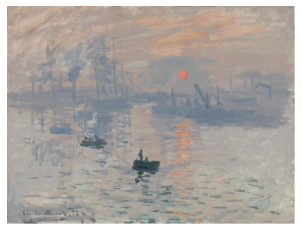

In [8]:
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt

# 打开图片文件
image = Image.open("data/ch26/sunrise.jpg")

# 模式P为8位深度图像，每个像素用8个bit表示
image_p = image.convert("P", palette=Image.ADAPTIVE)  
plt.imshow(image_p)
plt.axis('off')
plt.show()

### 4.4 对出现最多的五种颜色索引进行排序

In [11]:
# 图像中使用的颜色列表,maxcolors默认256
color_counts = sorted(image_p.getcolors(maxcolors=9999), reverse=True)
color_counts[:5]

[(176321, 0), (157641, 1), (155408, 2), (145272, 3), (88852, 4)]

**注：**  
&emsp;&emsp;由于`getcolors()`方法默认是被拿来处理8位图像的，因此它的参数`maxcolors`默认为256，即只能对索引小于等于256的索引进行正确处理。如果颜色索引超过了256，则`getcolors()`方法会返回`None`，需要手动指定 maxcolors 的值为更大的数量

### 4.5 查表取出RGB的颜色

In [12]:
# 以列表形式返回图像调色板
palette = image_p.getpalette()

# 通过颜色列表查找到真正的颜色
colors = []
for i in range(5):
    palette_index = color_counts[i][1]
    dominant_color = palette[palette_index * 3 : palette_index * 3 + 3]
    colors.append(tuple(dominant_color))

# 输出颜色
print(colors)

[(170, 154, 146), (149, 149, 150), (176, 165, 152), (173, 168, 165), (137, 139, 146)]


### 4.6 将色块与图片整合

&emsp;&emsp;把数字作为图片，和原画放在一起进行比较，看看提取的颜色是不是原画出现最多的颜色，利用出现最多的颜色，就能模仿大师的配色

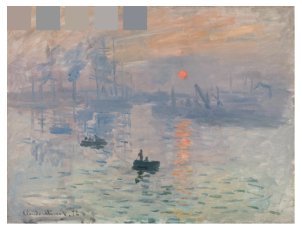

In [16]:
for i, val in enumerate(colors):
    image.paste(val,(0+i*120, 0 ,100+i*120, 100))

#  保存并显示图片
image.save("data/ch26/sunrise2.png")

plt.imshow(image)
plt.axis('off')
plt.show()

## 5 zipfile压缩库：如何给数据压缩&加密备份？

### 5.1 使用`zipfile`实现无密码压缩

- 示例场景：在定时备份时，需要按日期生成文件名，并压缩文件备份，及时保存服务器每天的文件变化
- 实现步骤：
  1. 目录遍历
  2. 按日期自动生成压缩包的文件名
  3. 把文件夹写入压缩文件

#### 5.1.1 目录遍历

使用`os.walk()`函数遍历目录

In [17]:
import os

# 遍历目录，得到该目录下所有的子目录和文件
def getAllFiles(dir):
    for root,dirs,files in os.walk(dir):
            for file in files:
                yield os.path.join(root, file)

#### 5.1.2 按日期自动生成压缩包的文件名

In [18]:
import datetime

# 以年月日作为zip文件名
def genZipfilename():
    today = datetime.date.today()
    basename = today.strftime('%Y%m%d')
    extname = "zip"
    return f"{basename}.{extname}"

#### 5.1.3 把文件夹写入压缩文件

In [19]:
from zipfile import ZipFile

def zipWithoutPassword(files,backupFilename):
    with ZipFile(backupFilename, 'w') as zf:
        for f in files:
            zf.write(f)

In [21]:
# 要备份的目录 
backupDir = r"data/ch27" 
# 要备份的文件 
backupFiles = getAllFiles(backupDir) 
# zip文件的名字“年月日.zip” 
zipFilename = genZipfilename() 
# 自动将要备份的目录制作成zip文件 
zipWithoutPassword(backupFiles, 'data/ch27/' + zipFilename)

### 5.2 使用可执行命令实现有密码压缩

- 使用工具：7zip、winrar
- 实现步骤：
  1. 将`7z.exe`放到命令搜索路径中或加入到系统环境变量中
  2. 使用外部命令调用方式，使用`7z.exe`命令

- `7z.exe`命令参数
    1. `a`参数：`7z.exe`能够把文件夹压缩为压缩包，也能解压一个压缩包。`a`参数用来指定7z将要对一个目录进行的压缩操作。
    2. `-t`参数：用来指定`7z.exe`制作压缩包的类型和名称。为了制作一个zip压缩包，我将把该参数指定为`-tzip`，并在该参数后指定zip压缩包的名称。
    3. `-p`参数：用来指定制作的压缩包的密码。
    4. “目录”参数：用来指定要把哪个目录制作为压缩包。

- 使用方式：
```
7z.exe a -tzip 20210412.zip -ppassword123 data/ch27
```

## 6 Celery库：让计算机定时执行任务，解放人力

### 6.1 定时执行任务的注意事项

- 计算机执行任务的方式：手动执行和定时执行
- 定时运行的任务：把代码编写成从任务开始到结束都不需要和“人”进行交互，是“非交互程序”
- 定时运行的程序不支持把任务的结果输出到字符终端的，只能把输出结果保存在文件中

### 6.2 使用Windows任务计划，执行定时任务

1. 启动任务计划程序：“管理工具” 里的“任务计划程序”或“控制面板”的“计划任务”
2. 创建基本任务：设置任务的名称、执行时间，以及要执行的是哪一类程序
3. 设置指定时间运行的任务：

### 6.3 使用Python的Celery执行定时任务

- 需要安装Celery库和Redis数据库

- Celery和Redis之间的定时任务工作过程：
  1. 包括Celery的Beat、Broker、Worker和Backend四个组件
  2. 前三个是 Celery 用于执行任务的组件，由 Celery 软件自身实现
  3. Broker是中间件，用来连接Beat和多个Worker组件，Beat作为任务的生产者、Worker作为任务的消费者，可以通过Broker进行通信，从而定时运行Worker组件的多个任务
  4. 最后一个是Celery的数据存储组件，基于Redis实现，用于存放用户添加的任务计划到数据库中
  5. Celery和Redis数据通过TCP网络协议连接

![Celery 和 Redis 之间的定时任务工作过程](images/section05/Celery-Redis-timed-task-working-process.jpg)

### 6.4 定时备份文件夹

- 实现思路：
  1. 需要编写代码的组件主要是Worker组件和Beat组件
  2. Beat组件编写的代码主要是任务的执行时间和该时间运行的任务名称


## 7 网络和邮件库：定时收发邮件，减少手动操作

### 7.1 实现定时收邮件

- 示例场景：每隔五分钟检查一次收件箱，判断收件箱中是否有30天内未读的邮件，并利用正则表达式根据邮件主题判断其中是否包含“故障”这一关键字
- 使用库：`yagmail`和`imaplib`库

#### 7.1.1 获取邮件主题

1. 指定邮件服务器的IMAP地址和端口
2. 使用用户名密码登录
3. 解析邮件主题：通过IMAP的`fetch()`命令将邮件ID对应的邮件内容下载本地后，才能进行解码，需要解码两次，才能看到邮件的主题

In [ ]:
import imaplib

conn = imaplib.IMAP4_SSL(host="imap.qq.com", port = 993)
conn.login("username@qq.com","password")
print(conn.list())

#### 7.1.2 imaplib读取邮件并得到邮件主题的原理

1. 使用`select()`函数，指定要读取的收件箱
2. 通过`search()`函数，获取30天内未读的邮件
3. 根据每个邮件ID得到邮件的主题，采用`for`循环遍历
4. 使用`fetch()`函数，使用邮件ID向服务器发起请求，得到该邮件的所有数据
5. 把从服务器得到的邮件内容进行解析、取出标题部分，并进行解码，使用`email`库的`message_from_string()`方法，对`MIME`类型进行解析

In [ ]:
import email

# 默认为INBOX
conn.select("INBOX")
# 搜索邮件，ALL为全部，可以按照发件人使用FROM过滤，也可以使用日期过滤
_, data = conn.search(None, 'unseen') 

for mailid in data[0].decode().split(" "):
    # 取回每一封未读邮件的内容
    # data = [b'1 2 3 4 5']
    _, maildata = conn.fetch(str(mailid), '(RFC822)')
    # 对每一封邮件的内容进行解析
    msg = email.message_from_string(maildata[0][1].decode('utf-8'))
    # 取得标题
    subject_tmp = msg.get('subject')
    # 为标题解码
    sj_decode = email.header.decode_header(subject_tmp)[0][0]
    #打印每一封标题
    subject = sj_decode.decode('utf-8')
    print(subject)
    
    # 将邮件标记为已读
    conn.store(mailid, '+FLAGS','\\seen')

### 7.2 实现自动发邮件

#### 7.2.1 连接邮件服务器

In [ ]:
import yagmail

conn = yagmail.SMTP(
        user="username@qq.com", 
        password="password",
        host="smtp.qq.com",
        port=465
)

#### 7.2.2 编写邮件正文

In [ ]:
content = "内容填充"

body = f"模版 {content}"

#### 7.2.3 发送邮件

- `send()`函数一般会使用四个参数，按照参数定义的顺序，它们分别是收件人邮箱、主题、邮件正文和附件

In [ ]:
# 发送邮件
conn.send("receiver@qq.com", "主题", body, "one.jpg")

## 8 怎么快速把任意文件格式转成PDF，并批量加水印？

### 8.1 将Word文档转换为PDF

In [84]:
from win32com import client

def word2pdf(filepath, wordname, pdfname):
    worddir = filepath
    # 指定Word类型
    word = client.DispatchEx("Word.Application")
    # 使用Word软件打开a.doc
    file = word.Documents.Open('\\'.join([worddir, wordname]), ReadOnly=1)
    # 文件另存为当前目录下的pdf文件
    file.ExportAsFixedFormat('\\'.join([worddir, pdfname]), ExportFormat=17, 
                             Item=7, CreateBookmarks=0)
    # 关闭文件
    file.Close()
    # 结束word应用程序进程   
    word.Quit()

In [85]:
import os

# 获取当前文件的父目录
father_path = os.path.abspath(os.getcwd())

file_path = '\\'.join([father_path, 'data', 'ch30'])
word_name = 'a.docx'
pdf_name = 'a.pdf'

word2pdf(file_path, word_name, pdf_name)

### 8.2 将Excel表格转换为PDF

In [56]:
from win32com import client

def excel2pdf(filepath, excelname, pdfname):
    exceldir = filepath
    # 指定Excel类型
    excel = client.DispatchEx("Excel.Application")
    # 使用Excel软件打开a.xls
    file = excel.Workbooks.Open('\\'.join([exceldir, excelname]), False)
    # 文件另存为当前目录下的pdf文件
    file.ExportAsFixedFormat(0, '\\'.join([exceldir, pdfname]))
    # 关闭文件
    file.Close()
    # 结束excel应用程序进程   
    excel.Quit()

In [57]:
file_path = '\\'.join([father_path, 'data', 'ch30'])
excel_name = 'b.xlsx'
pdf_name = 'b.pdf'

excel2pdf(file_path, excel_name, pdf_name)

### 8.3 将PowerPoint幻灯片转换为PDF

In [80]:
from win32com import client

def ppt2pdf(filepath, pptname, pdfname):
    pptdir = filepath
    # 指定PPT类型
    ppt = client.DispatchEx("PowerPoint.Application")
    # 使用ppt软件打开a.ppt
    file = ppt.Presentations.Open('\\'.join([pptdir, pptname]), False)
    # 文件另存为当前目录下的pdf文件
    file.ExportAsFixedFormat('\\'.join([pptdir, pdfname]), FixedFormatType=2, 
                             PrintRange=None)
    # 关闭文件
    file.Close()
    # 结束excel应用程序进程   
    ppt.Quit()

In [81]:
file_path = '\\'.join([father_path, 'data', 'ch30'])
ppt_name = 'c.ppt'
pdf_name = 'c.pdf'

ppt2pdf(file_path, ppt_name, pdf_name)

### 8.4 为PDF增加水印

- 使用库：`pyPDF4`库，不需要在当前计算机上安装任何PDF编辑器，就可以给PDF文件增加水印
- 实现原理：把只带有水印的PDF文件，和需要增加水印的PDF文件合并即可
- 主要步骤：
  1. 准备水印文件
  2. 安装`pyPDF4`库
  3. 合并两个PDF文件

In [90]:
from PyPDF4 import PdfFileReader, PdfFileWriter

def watermark(pdfWithoutWatermark, watermarkfile, pdfWithWatermark):
    # 准备合并后的文件对象
    pdfWriter = PdfFileWriter()
    
    watermark_file = open(watermarkfile, 'rb')
    watermarkpage = PdfFileReader(watermark_file, strict=False)   
    # 打开需要增加水印的文件
    pdfWithoutWatermark_file = open(pdfWithoutWatermark, 'rb')
    pdf_file = PdfFileReader(pdfWithoutWatermark_file, strict=False)

    for i in range(pdf_file.getNumPages()):
        # 从第一页开始处理
        page = pdf_file.getPage(i)
        # 合并水印和当前页
        page.mergePage(watermarkpage.getPage(0))
        # 将合并后的PDF文件写入新的文件
        pdfWriter.addPage(page)
    
    # 写入新的PDF文件
    pdfWithWatermark_file = open(pdfWithWatermark, 'wb')
    pdfWriter.write(pdfWithWatermark_file)
    
    watermark_file.close()
    pdfWithoutWatermark_file.close()
    pdfWithWatermark_file.close()

In [91]:
pdf_without_watermark = "data/ch30/合同.pdf"
pdf_with_watermark = "data/ch30/带水印合同.pdf"
watermark_file = "data/ch30/水印.pdf"

watermark(pdf_without_watermark, watermark_file, pdf_with_watermark)

## 9 总结

&emsp;&emsp;本篇章介绍了数据透视表的使用、条形/饼状/柱状图的使用、使用Echarts实现动态图表、提取图片中的色块、使用zipfile库进行数据压缩、使用Celery库进行定时任务执行、定时收发邮件、PDF文件转换。
1. 通过使用Excel中的数据透视表，以及它的增强插件“Power Pivot”，实现自动化处理的大量数据结果，使用数据透视表还能快速改变数据统计逻辑，快速响应新的工作统计需求
2. 使用`seaborn`库，根据业务场景，实现各种类型数据图的绘制
3. 通过疫情实时信息的动态图表绘制示例，使用`pyecharts`库，实现动态图的渲染
4. 使用`Pillow`库，利用莫奈的名画《日出·印象》，提取图片中出现最多的像素，并将像素的RGB值进行打印，得到配色方案
5. 通过`zipfile`库和7zip软件，分别实现了无密码压缩文件和有密码压缩文件
6. 通过基于Windows的任务计划功能和`Celery`库实现的定时任务配置，在配置定时任务上的逻辑是相同的，但是在配置方法和执行方法上有较大区别：Windows的配置更加直接，而`Celery`配置则需要掌握`crontab()`函数的参数
7. 基于`yagmail`、`imaplib`和`email`库实现了邮件自动收发的功能，利用`yagmail`自动发邮件前，还可以为周期发送的邮件指定模版，通过`Celery`实现定时发送和周期发送邮件
8. 通过`pywin32`库的COM编程接口，调用VBA脚本实现格式的转换，完成Word、Excel和PPT转成PDF的功能；利用`pyPDF4`库将文件转换为PDF之后，还能对PDF的格式和内容进行调整